In [134]:
from numpy import *
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from dmba import classificationSummary
from sklearn import linear_model
import seaborn as sns
import numpy as np

In [135]:
import os
os.getcwd()
os.chdir('C:\\Users\\Ken\\Desktop\\IT 483')

In [136]:
df = pd.read_csv('Insurance Data Set.csv')
df.drop(columns=['Customer Identifier', 'Policy ID', 'first_name', 'last_name', 'email', 'Model', 'Make', 'Model Year', 'Vin', 'Color', 'City', 'State', 'Insurance Year'], inplace=True)
df["Prior Accident?"].replace({"No": "0", "Yes": "1"}, inplace=True)
df = df.astype({"Prior Accident?": int})
df

,Prior Accident?,Deductible,Annual Premium
0,0,750,468.00000
1,0,1250,364.00000
2,0,2500,122.40000
3,0,250,544.50000
4,1,500,728.00000
...,...,...,...
5877,1,1500,832.07520
5878,0,2250,114.64960
5879,0,1750,501.13620
5880,0,2250,501.08625


In [137]:
y = df['Prior Accident?']
X = df.drop(columns=['Prior Accident?'])

In [138]:
train_X, valid_X, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

In [139]:
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns))

intercept  -2.628967894837611
                   coeff
Deductible      0.001275
Annual Premium  0.001275


In [141]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 'p(0)': [p[0] for p in logit_reg_proba], 'p(1)': [p[1] for p in logit_reg_proba], 'predicted': logit_reg_pred })


In [142]:
classificationSummary(train_y, logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.8940)

       Prediction
Actual    0    1
     0 3155    0
     1  374    0


In [143]:
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9040)

       Prediction
Actual    0    1
     0 2127    0
     1  226    0


In [144]:
logit_reg.fit(X,y)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns))

intercept  -2.9307098607179873
                   coeff
Deductible      0.000194
Annual Premium  0.001264


In [146]:
df['PROB'] = logit_reg.predict_proba(X)[:,1] # predict_proba gives you a no and a yes probability.  We only want the second one.
print(df)

      Prior Accident?  Deductible  Annual Premium      PROB
0                   0         750       468.00000  0.100328
1                   0        1250       364.00000  0.097250
2                   0        2500       122.40000  0.091843
3                   0         250       544.50000  0.100311
4                   1         500       728.00000  0.128611
...               ...         ...             ...       ...
5877                1        1500       832.07520  0.169686
5878                0        2250       114.64960  0.087098
5879                0        1750       501.13620  0.123701
5880                0        2250       501.08625  0.134588
5881                0        1750       360.50000  0.105678

[5882 rows x 4 columns]


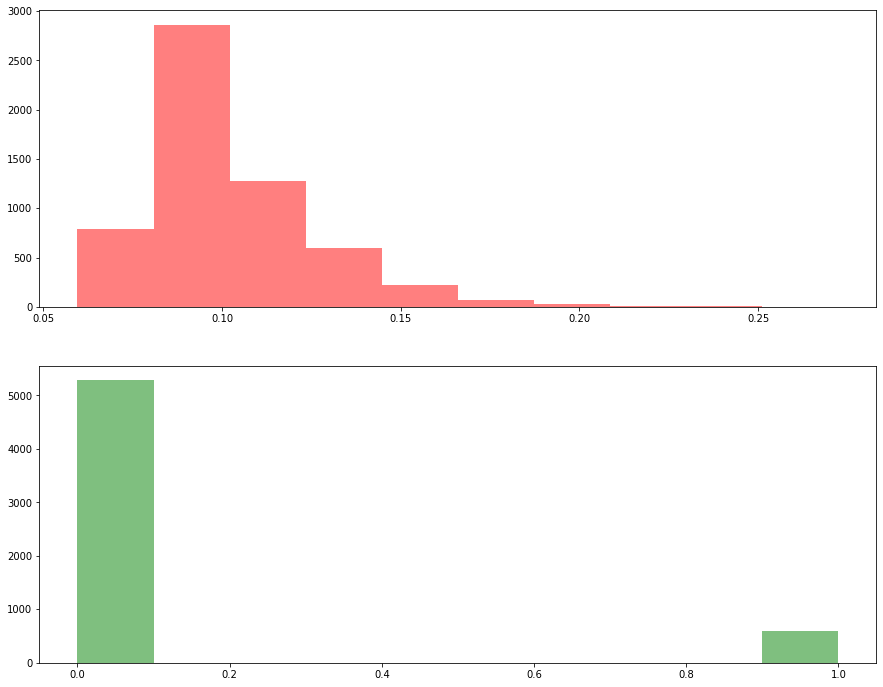

In [147]:
fig, ax = plt.subplots(2, 1, figsize=(15,12))
ax[0].hist(df['PROB'], bins=10, alpha = 0.5, color = 'r')
ax[1].hist(df['Prior Accident?'], bins=10, alpha = 0.5, color = 'g')
plt.show()